## import library

In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

## Download Font

In [ ]:
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('try')    

plt.rcParams['axes.unicode_minus'] = False

## Read raw data

In [3]:
data_draw_korea = pd.read_excel('C:\/Users/inolab/Desktop/시각화/dddd/data_korea.xlsx')

In [4]:
data_draw_korea.head()

,pop,name,x,y,size,matro,area,lotteria,burgerking,kfc,subway,momstouch,mcdonalds,index,level
0,140595,서울종로,6,3,23.90,서울특별시,종로구,3,3,6,14,3,5,4.666667,matropolitan
1,114967,서울중구,6,4,9.96,서울특별시,중구,4,8,0,11,1,4,4.600000,matropolitan
2,407416,서울서초,6,6,47.04,서울특별시,서초구,5,7,8,5,2,6,3.714286,matropolitan
3,526157,서울강남,6,7,39.50,서울특별시,강남구,8,13,7,14,9,11,2.647059,matropolitan
4,364232,서울마포,5,4,23.87,서울특별시,마포구,6,5,2,11,5,5,2.090909,matropolitan


## Burger_index geographic

In [5]:
# 시도 경계

BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]
gamma = 0.75

blockedMap = data_draw_korea
targetData = 'index'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

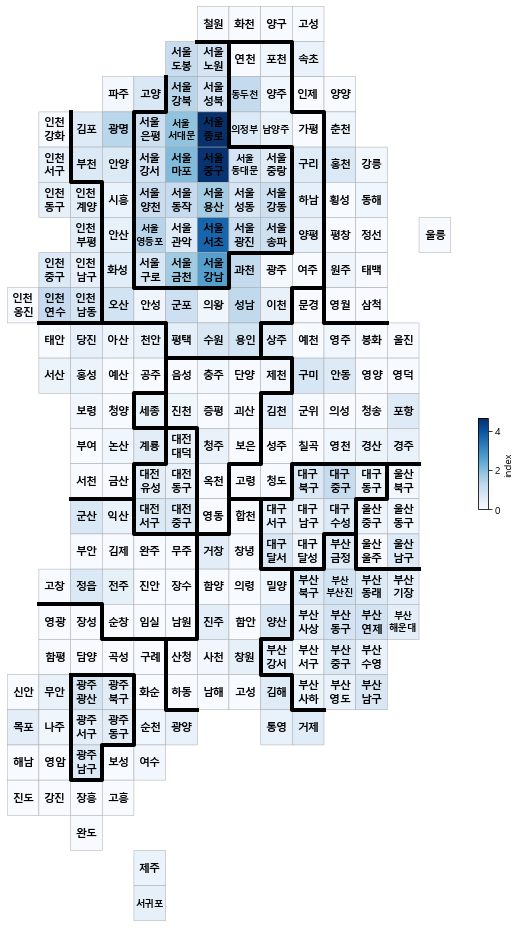

In [6]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역명 표시
for idx, row in blockedMap.iterrows():
    annocolor ='black'
    
    # 겹치는 구 이름 시 이름과 같이 표시
    if row['matro'].endswith('시') and not row['matro'].startswith('세종'):
        dispname = '{}\n{}'.format(row['matro'][:2], row['area'][:-1])
        if len(row['area']) <= 2:
            dispname += row['area'][-1]
    else:
        dispname = row['area'][:-1]

    # 긴 이름 크기 줄이기
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.savefig('foo.png')
plt.show()

## Population geographic

In [8]:
targetData = 'pop'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

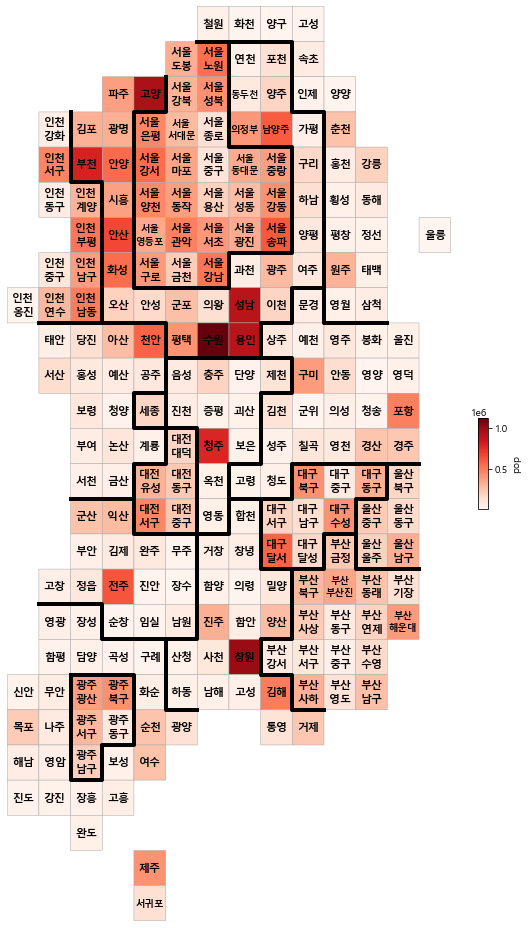

In [10]:
cmapname = 'Reds' #'Blue'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역명 표시
for idx, row in blockedMap.iterrows():
    annocolor ='black'
    
    # 겹치는 구 이름 시 이름과 같이 표시
    if row['matro'].endswith('시') and not row['matro'].startswith('세종'):
        dispname = '{}\n{}'.format(row['matro'][:2], row['area'][:-1])
        if len(row['area']) <= 2:
            dispname += row['area'][-1]
    else:
        dispname = row['area'][:-1]

    # 긴 이름 크기 줄이기
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.savefig('foo1.png')
plt.show()